In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:

import pandas as pd
data = pd.read_csv('ToyotaCorolla.csv', encoding= 'unicode_escape')

In [3]:
data

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

In [4]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:

data1=data.rename({'Age_08_04':'age'},axis=1)
data1

Id                                              Model  Price  age  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   23   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   23   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   24   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   26   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   30   
...    ...                                                ...    ...  ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   69   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   72   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   71   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   70   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   76   

      Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ... Central_Lock  \
0            10      2002  46986    Diesel   90          1  ...            1   
1            10      2002  72937    Diesel   90          1  ...            1   
2             9      2002  41711    Diesel   90          1  ...            0   
3             7      2002  48000    Diesel   90          0  ...            0   
4             3      2002  38500    Diesel   90          0  ...            1   
...         ...       ...    ...       ...  ...        ...  ...          ...   
1431         12      1998  20544    Petrol   86          1  ...            1   
1432          9      1998  19000    Petrol   86          0  ...            0   
1433         10      1998  17016    Petrol   86          0  ...            0   
1434         11      1998  16916    Petrol   86          1  ...            0   
1435          5      1998      1    Petrol  110          0  ...            0   

      Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                   1               1      0          0            0   
1                   0               1      0          0            0   
2                   0               1      0          0            0   
3                   0               1      0          0            0   
4                   1               1      0          1            0   
...               ...             ...    ...        ...          ...   
1431                1               1      0          1            1   
1432                0               1      0          0            1   
1433                0               1      0          0            0   
1434                0               0      0          0            0   
1435                0               1      0          0            0   

      Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                    1             0               0        0  
1                    1             0               0        0  
2                    1             0               0        0  
3                    1             0               0        0  
4                    1             0               0        0  
...                ...           ...             ...      ...  
1431                 1             0               0        0  
1432                 1             0               0        0  
1433                 1             0               0        0  
1434                 1             0               0        0  
1435                 0             0               0        0  

[1436 rows x 38 columns]

In [6]:
data1[data1.duplicated()]

Empty DataFrame
Columns: [Id, Model, Price, age, Mfg_Month, Mfg_Year, KM, Fuel_Type, HP, Met_Color, Color, Automatic, cc, Doors, Cylinders, Gears, Quarterly_Tax, Weight, Mfr_Guarantee, BOVAG_Guarantee, Guarantee_Period, ABS, Airbag_1, Airbag_2, Airco, Automatic_airco, Boardcomputer, CD_Player, Central_Lock, Powered_Windows, Power_Steering, Radio, Mistlamps, Sport_Model, Backseat_Divider, Metallic_Rim, Radio_cassette, Tow_Bar]
Index: []

[0 rows x 38 columns]

In [7]:
data1.describe()

Id         Price          age    Mfg_Month     Mfg_Year  \
count  1436.000000   1436.000000  1436.000000  1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075     5.548747  1999.625348   
std     416.476890   3626.964585    18.599988     3.354085     1.540722   
min       1.000000   4350.000000     1.000000     1.000000  1998.000000   
25%     361.750000   8450.000000    44.000000     3.000000  1998.000000   
50%     721.500000   9900.000000    61.000000     5.000000  1999.000000   
75%    1081.250000  11950.000000    70.000000     8.000000  2001.000000   
max    1442.000000  32500.000000    80.000000    12.000000  2004.000000   

                  KM           HP    Met_Color    Automatic           cc  ...  \
count    1436.000000  1436.000000  1436.000000  1436.000000   1436.00000  ...   
mean    68533.259749   101.502089     0.674791     0.055710   1576.85585  ...   
std     37506.448872    14.981080     0.468616     0.229441    424.38677  ...   
min         1.000000    69.000000     0.000000     0.000000   1300.00000  ...   
25%     43000.000000    90.000000     0.000000     0.000000   1400.00000  ...   
50%     63389.500000   110.000000     1.000000     0.000000   1600.00000  ...   
75%     87020.750000   110.000000     1.000000     0.000000   1600.00000  ...   
max    243000.000000   192.000000     1.000000     1.000000  16000.00000  ...   

       Central_Lock  Powered_Windows  Power_Steering        Radio  \
count   1436.000000      1436.000000     1436.000000  1436.000000   
mean       0.580084         0.561978        0.977716     0.146240   
std        0.493717         0.496317        0.147657     0.353469   
min        0.000000         0.000000        0.000000     0.000000   
25%        0.000000         0.000000        1.000000     0.000000   
50%        1.000000         1.000000        1.000000     0.000000   
75%        1.000000         1.000000        1.000000     0.000000   
max        1.000000         1.000000        1.000000     1.000000   

         Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  \
count  1436.000000  1436.000000       1436.000000   1436.000000   
mean      0.256964     0.300139          0.770195      0.204735   
std       0.437111     0.458478          0.420854      0.403649   
min       0.000000     0.000000          0.000000      0.000000   
25%       0.000000     0.000000          1.000000      0.000000   
50%       0.000000     0.000000          1.000000      0.000000   
75%       1.000000     1.000000          1.000000      0.000000   
max       1.000000     1.000000          1.000000      1.000000   

       Radio_cassette      Tow_Bar  
count     1436.000000  1436.000000  
mean         0.145543     0.277855  
std          0.352770     0.448098  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          0.000000     0.000000  
75%          0.000000     1.000000  
max          1.000000     1.000000  

[8 rows x 35 columns]

In [8]:
data1.corr()

Id     Price       age  Mfg_Month  Mfg_Year        KM  \
Id                1.000000 -0.738250  0.906132   0.043742 -0.919523  0.273298   
Price            -0.738250  1.000000 -0.876590  -0.018138  0.885159 -0.569960   
age               0.906132 -0.876590  1.000000  -0.123255 -0.983661  0.505672   
Mfg_Month         0.043742 -0.018138 -0.123255   1.000000 -0.057416 -0.020630   
Mfg_Year         -0.919523  0.885159 -0.983661  -0.057416  1.000000 -0.504974   
KM                0.273298 -0.569960  0.505672  -0.020630 -0.504974  1.000000   
HP               -0.109375  0.314990 -0.156622  -0.039312  0.164697 -0.333538   
Met_Color        -0.079713  0.108905 -0.108150   0.030266  0.103310 -0.080503   
Automatic         0.066265  0.033081  0.031717   0.009146 -0.033567 -0.081854   
cc               -0.117704  0.126389 -0.098084   0.037387  0.091892  0.102683   
Doors            -0.130207  0.185326 -0.148359  -0.012069  0.151442 -0.036197   
Cylinders              NaN       NaN       NaN        NaN       NaN       NaN   
Gears            -0.043343  0.063104 -0.005364  -0.013063  0.007766  0.015023   
Quarterly_Tax    -0.240821  0.219197 -0.198431   0.031373  0.193934  0.278165   
Weight           -0.414500  0.581198 -0.470253  -0.002167  0.473478 -0.028598   
Mfr_Guarantee    -0.162006  0.197802 -0.164658  -0.005771  0.166697 -0.212851   
BOVAG_Guarantee  -0.015065  0.028133  0.006865  -0.003863 -0.006206  0.001438   
Guarantee_Period -0.086256  0.146627 -0.152563   0.029010  0.148218 -0.138942   
ABS              -0.461437  0.306138 -0.412887   0.072532  0.402215 -0.177203   
Airbag_1         -0.123465  0.093588 -0.105406   0.003756  0.105359 -0.018012   
Airbag_2         -0.358316  0.248974 -0.329017   0.076749  0.317075 -0.139275   
Airco            -0.386207  0.429259 -0.403600   0.057088  0.395674 -0.133057   
Automatic_airco  -0.327468  0.588262 -0.426259  -0.049017  0.437718 -0.258221   
Boardcomputer    -0.695207  0.601292 -0.719449   0.017715  0.720567 -0.353862   
CD_Player        -0.464520  0.481374 -0.510895  -0.016736  0.517008 -0.266826   
Central_Lock     -0.238940  0.343458 -0.279631   0.010055  0.279490 -0.125177   
Powered_Windows  -0.236723  0.356518 -0.283856   0.025185  0.280996 -0.156242   
Power_Steering   -0.091587  0.064275 -0.069192  -0.055495  0.079676  0.007397   
Radio            -0.010971 -0.041887  0.013791   0.031601 -0.019607  0.013661   
Mistlamps        -0.139708  0.222083 -0.126895  -0.033504  0.133737 -0.074327   
Sport_Model      -0.028704  0.164121 -0.110988   0.052789  0.102080 -0.044784   
Backseat_Divider -0.136398  0.102569 -0.116751   0.023245  0.113237 -0.045658   
Metallic_Rim     -0.022232  0.108564 -0.040045   0.023506  0.036022 -0.013599   
Radio_cassette   -0.011611 -0.043179  0.012857   0.032576 -0.018844  0.015770   
Tow_Bar           0.159171 -0.172369  0.188720  -0.042170 -0.182206  0.084153   

                        HP  Met_Color  Automatic        cc  ...  Central_Lock  \
Id               -0.109375  -0.079713   0.066265 -0.117704  ...     -0.238940   
Price             0.314990   0.108905   0.033081  0.126389  ...      0.343458   
age              -0.156622  -0.108150   0.031717 -0.098084  ...     -0.279631   
Mfg_Month        -0.039312   0.030266   0.009146  0.037387  ...      0.010055   
Mfg_Year          0.164697   0.103310  -0.033567  0.091892  ...      0.279490   
KM               -0.333538  -0.080503  -0.081854  0.102683  ...     -0.125177   
HP                1.000000   0.058712   0.013144  0.035856  ...      0.250122   
Met_Color         0.058712   1.000000  -0.019335  0.031812  ...      0.153307   
Automatic         0.013144  -0.019335   1.000000  0.066740  ...     -0.002502   
cc                0.035856   0.031812   0.066740  1.000000  ...      0.072634   
Doors             0.092424   0.085243  -0.027654  0.079903  ...      0.132092   
Cylinders              NaN        NaN        NaN       NaN  ...           NaN   
Gears             0.209477   0.018601  -0.098555  0.01

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

In [10]:
model=smf.ols("Price~Id+age",data=data1).fit()

In [11]:
model.params

Intercept    21422.460998
Id               2.728387
age           -226.290971
dtype: float64

In [12]:
model.tvalues , np.round(model.pvalues,5)

(Intercept    122.527879
 Id            10.843723
 age          -40.166260
 dtype: float64,
 Intercept    0.0
 Id           0.0
 age          0.0
 dtype: float64)

In [13]:
model.rsquared , model.rsquared_adj 

(0.785973101989557, 0.7856743903384609)

In [24]:
slr_m=smf.ols("Price~age",data=data1).fit()
slr_m.tvalues , slr_m.pvalues

(Intercept    138.907847
 age          -68.978267
 dtype: float64,
 Intercept    0.0
 age          0.0
 dtype: float64)

In [26]:
slr_m=smf.ols("Price~Mfg_Month",data=data1).fit()
slr_m.tvalues , slr_m.pvalues

(Intercept    58.561114
 Mfg_Month    -0.686975
 dtype: float64,
 Intercept    0.00000
 Mfg_Month    0.49221
 dtype: float64)

In [27]:
mlr_am=smf.ols("Price~age+Mfg_Month",data=data1).fit()
mlr_am.tvalues , mlr_am.pvalues

(Intercept    126.671443
 age          -72.228040
 Mfg_Month    -10.370574
 dtype: float64,
 Intercept    0.000000e+00
 age          0.000000e+00
 Mfg_Month    2.391995e-24
 dtype: float64)

In [31]:
rsq_r=smf.ols("Price~Id+Mfg_Month",data=data1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("Id~Price+Mfg_Month",data=data1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("Mfg_Month~Id+Price",data=data1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['Id','Price','Mfg_Month'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

Variables       Vif
0         Id  2.198836
1      Price  2.202326
2  Mfg_Month  1.002359

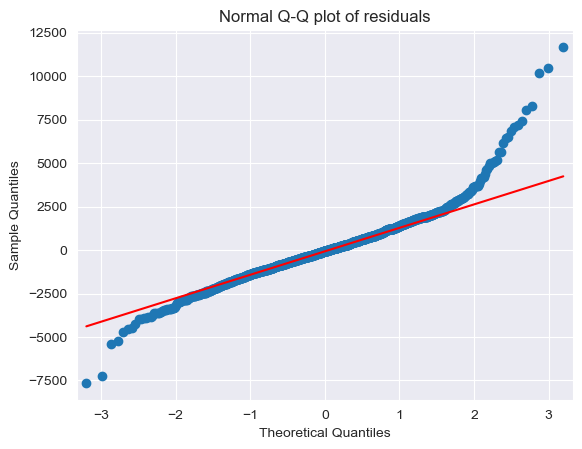

In [19]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()


In [20]:
list(np.where(model.resid<-30000))

[array([], dtype=int64)]

In [22]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()

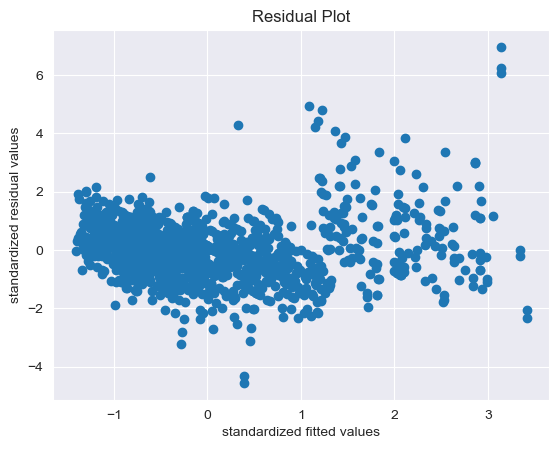

In [23]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

eval_env: 1


<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

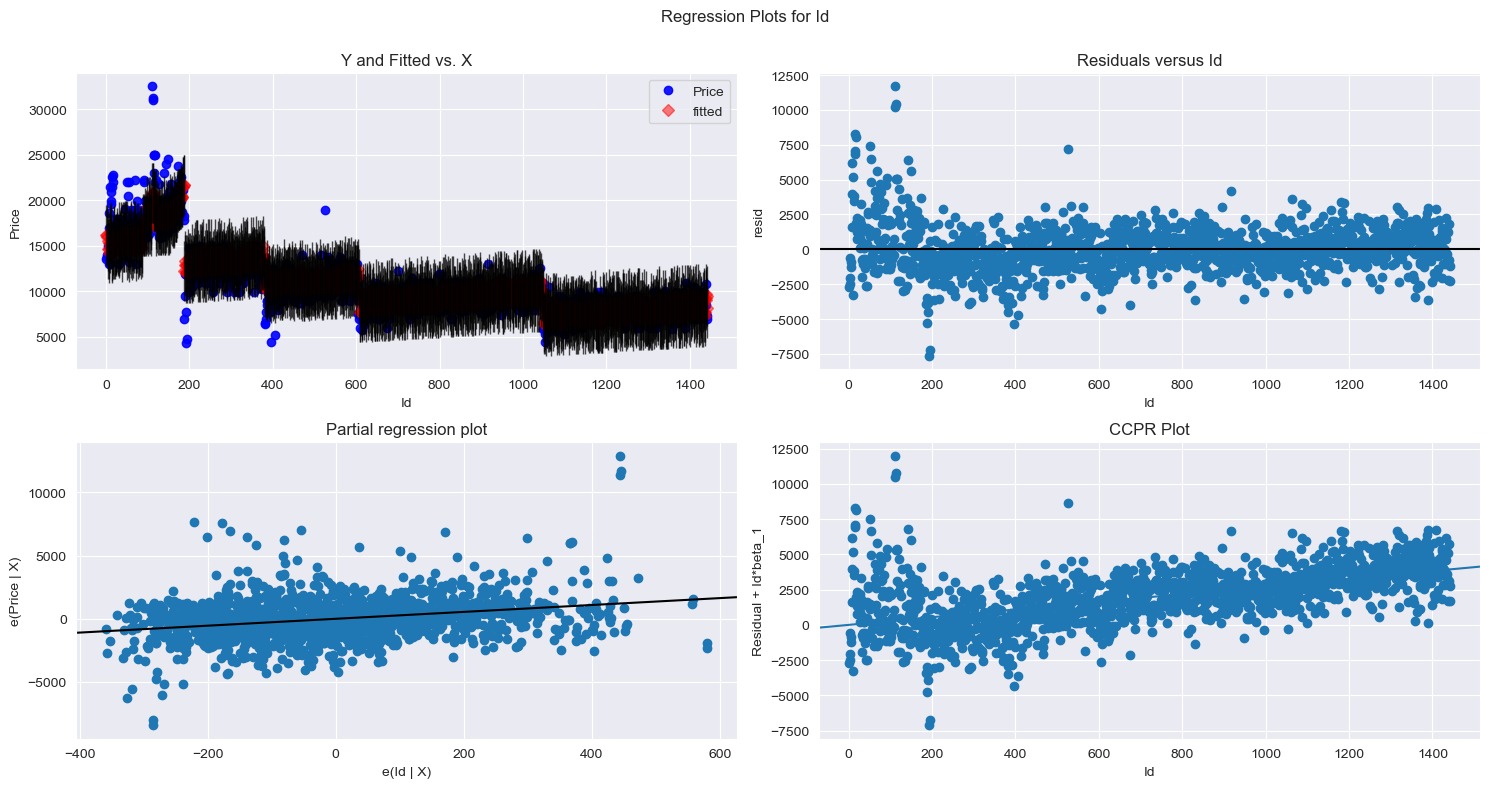

In [34]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Id',fig=fig)
plt.show()


In [37]:
(c,_)=model.get_influence().cooks_distance
c

array([0.00259111, 0.0021398 , 0.00143038, ..., 0.0003664 , 0.00326365,
       0.00064634])

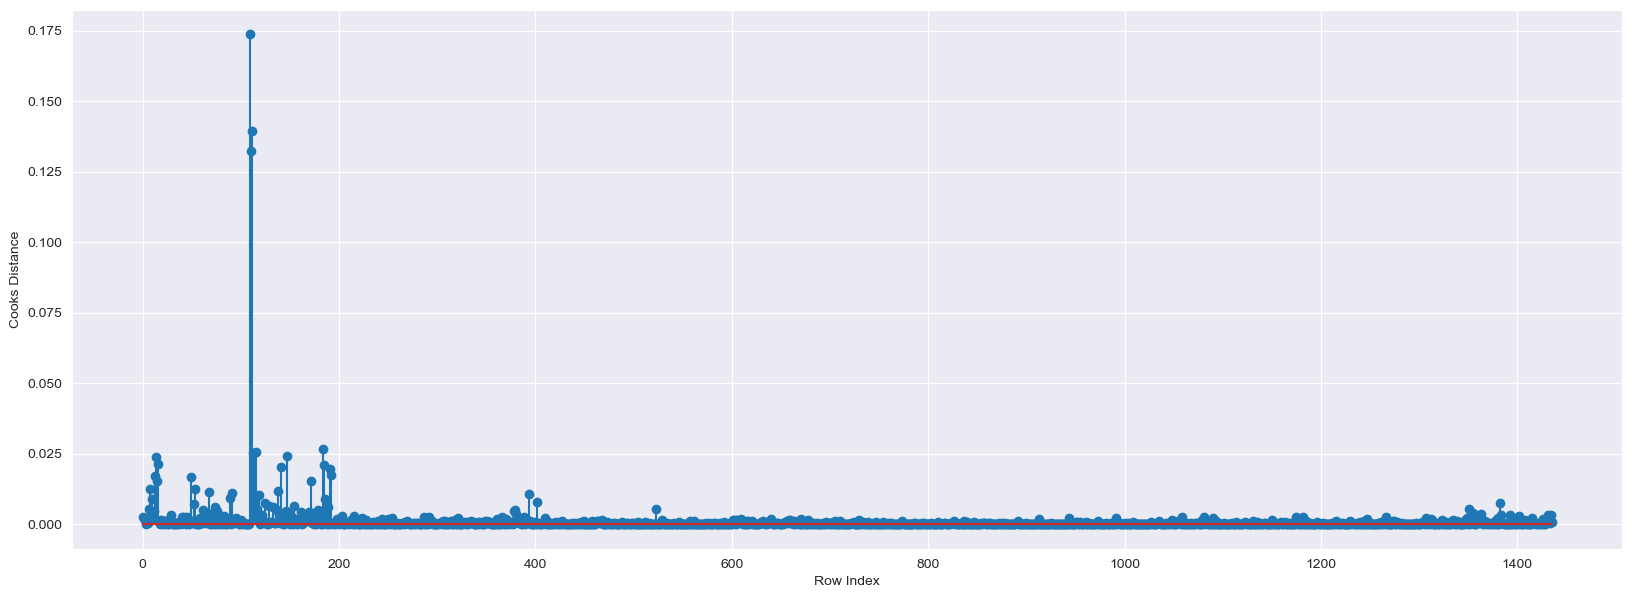

In [39]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

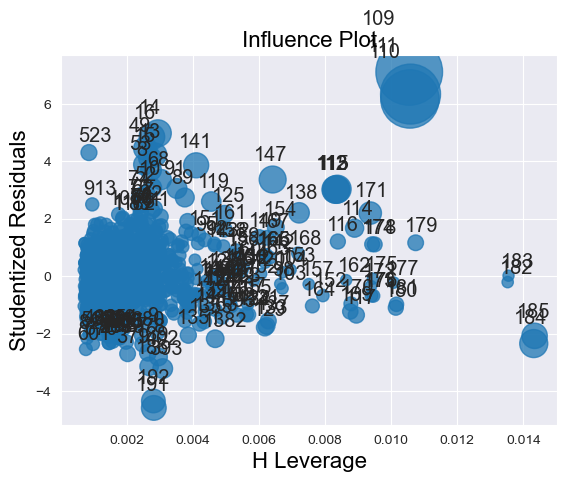

In [41]:
influence_plot(model)
plt.show()

In [42]:
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n

leverage_cutoff

0.08147632311977716

In [47]:
while np.max(c)>0.5 :
    model=smf.ols("Price~Id+Mfg_Month",data=data2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("Price~Id+Mfg_Month",data=data2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.5447449118985379


In [48]:
final_model.rsquared

0.5447449118985379

In [50]:
data2

Id                                              Model  Price  age  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   23   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   23   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   24   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   26   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   30   
...    ...                                                ...    ...  ...   
1430  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   69   
1431  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   72   
1432  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   71   
1433  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   70   
1434  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   76   

      Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ... Central_Lock  \
0            10      2002  46986    Diesel   90          1  ...            1   
1            10      2002  72937    Diesel   90          1  ...            1   
2             9      2002  41711    Diesel   90          1  ...            0   
3             7      2002  48000    Diesel   90          0  ...            0   
4             3      2002  38500    Diesel   90          0  ...            1   
...         ...       ...    ...       ...  ...        ...  ...          ...   
1430         12      1998  20544    Petrol   86          1  ...            1   
1431          9      1998  19000    Petrol   86          0  ...            0   
1432         10      1998  17016    Petrol   86          0  ...            0   
1433         11      1998  16916    Petrol   86          1  ...            0   
1434          5      1998      1    Petrol  110          0  ...            0   

      Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                   1               1      0          0            0   
1                   0               1      0          0            0   
2                   0               1      0          0            0   
3                   0               1      0          0            0   
4                   1               1      0          1            0   
...               ...             ...    ...        ...          ...   
1430                1               1      0          1            1   
1431                0               1      0          0            1   
1432                0               1      0          0            0   
1433                0               0      0          0            0   
1434                0               1      0          0            0   

      Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                    1             0               0        0  
1                    1             0               0        0  
2                    1             0               0        0  
3                    1             0               0        0  
4                    1             0               0        0  
...                ...           ...             ...      ...  
1430                 1             0               0        0  
1431                 1             0               0        0  
1432                 1             0               0        0  
1433                 1             0               0        0  
1434                 0             0               0        0  

[1435 rows x 38 columns]